In [1]:
# 基本パッケージ（numpy,Pandas,matplotlib,Seaborn）
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# ランダムフォレスト
from sklearn.ensemble import RandomForestClassifier
# LightGBM
import lightgbm as lgb
# XGboost
import xgboost as xgb
# train_test_split（データを分割出してくれる）
from sklearn.model_selection import train_test_split
# accuracy_score（正解率を測れる）
from sklearn.metrics import accuracy_score
# グリッドサーチ（ハイパーパラメータを自動的に最適化してくれる）
from sklearn.model_selection import GridSearchCV
# 正規化、標準化用
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# 特徴量選択用
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
# 交差検証用
from sklearn.model_selection import cross_val_score
# 多項式特徴量生成用
from sklearn.preprocessing import PolynomialFeatures
# モデルの保存
from sklearn.externals import joblib

D:\Program\Anaconda3\envs\sklearn1.9.1\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# 表示関連
# DataFrameの列数設定
pd.set_option('display.max_columns', 500)

In [3]:
# 株価データの読み込み
stock_data = pd.read_csv("stock_Price_Prediction_v3.4.csv", encoding="shift-jis")

# 読み込みデータの表示
stock_data.head()

,Open,High,Low,Volume,Adj Close,ema_5,ema_12,ema_26,macd_5-12,macd_12-26,Open000001.SS,High000001.SS,Low000001.SS,Adj Close000001.SS,Open^AORD,High^AORD,Low^AORD,Adj Close^AORD,Open^AXJO,High^AXJO,Low^AXJO,Adj Close^AXJO,Open^BFX,High^BFX,Low^BFX,Adj Close^BFX,Open^BSESN,High^BSESN,Low^BSESN,Adj Close^BSESN,Open^BVSP,High^BVSP,Low^BVSP,Adj Close^BVSP,Open^DJI,High^DJI,Low^DJI,Adj Close^DJI,Open^FCHI,High^FCHI,Low^FCHI,Adj Close^FCHI,Open^GDAXI,High^GDAXI,Low^GDAXI,Adj Close^GDAXI,Open^GSPC,High^GSPC,Low^GSPC,Adj Close^GSPC,Open^GSPTSE,High^GSPTSE,Low^GSPTSE,Adj Close^GSPTSE,Open^HSI,High^HSI,Low^HSI,Adj Close^HSI,Open^IPSA,High^IPSA,Low^IPSA,Adj Close^IPSA,Open^IXIC,High^IXIC,Low^IXIC,Adj Close^IXIC,Open^JKSE,High^JKSE,Low^JKSE,Adj Close^JKSE,Open^KS11,High^KS11,Low^KS11,Adj Close^KS11,Open^MERV,High^MERV,Low^MERV,Adj Close^MERV,Open^MXX,High^MXX,Low^MXX,Adj Close^MXX,Open^N100,High^N100,Low^N100,Adj Close^N100,Open^NYA,High^NYA,Low^NYA,Adj Close^NYA,Open^RUT,High^RUT,Low^RUT,Adj Close^RUT,Open^TWII,High^TWII,Low^TWII,Adj Close^TWII,Open^VIX,High^VIX,Low^VIX,Adj Close^VIX,Open^XAX,High^XAX,Low^XAX,Adj Close^XAX,USD,GBP,EUR,CAD,CHF,SEK,DKK,NOK,AUD,NZD,ZAR,BHD,IDR(100),CNY,HKD,INR,PHP,SGD,KRW(100),THB,KWD,SAR,AED,MXN,TWD,pvema_5,pvema_12,pvema_26,answer
0,-0.006250,0.024889,-0.003604,2.643314,0.018700,0.006350,0.001987,0.001856,-0.718138,0.012851,-0.016024,-0.004302,0.004251,0.007344,-0.007255,-0.006006,-0.001020,-0.002846,-0.008053,-0.007226,-0.000710,-0.002805,-0.004067,0.006438,0.002904,0.010276,-0.001324,-0.010327,-0.009173,-0.012208,-0.014983,-0.014038,-0.013892,-0.012080,-0.003927,-0.001217,-0.012214,-0.011191,-0.011637,-0.009375,-0.009456,0.001065,-0.016036,-0.010612,-0.004488,-0.005506,-0.008530,-0.006707,-0.014114,-0.009993,-0.003407,-0.004167,-0.006936,-0.006474,-0.018231,-0.018280,-0.003118,-0.004052,-0.009256,-0.003805,-0.000105,0.005605,-0.014401,-0.014141,-0.018726,-0.011112,0.003838,0.000590,0.004085,-0.001906,0.023984,0.016071,0.030788,0.014635,-0.002590,-0.027515,-0.014697,-0.008481,-0.007267,-0.009166,-0.017076,-0.017050,-0.006375,-0.007674,-0.007250,-0.001550,-0.009459,-0.009459,-0.009459,-0.009459,-0.007948,-0.005887,-0.009231,-0.007772,-0.004409,-0.003112,-0.003727,0.008201,0.015167,0.054611,0.014644,0.054280,0.001202,-0.003871,-0.007277,-0.008593,0.000000,-0.002711,-0.001877,0.003238,-0.001622,-0.003846,-0.001268,-0.000656,0.001690,-0.000849,0.009338,0.000000,-0.007246,0.000000,0.000000,0.003663,0.000000,-0.000831,-0.008893,-0.006536,0.003609,0.000000,0.000000,-0.002027,0.000000,0.012620,0.010905,0.023161,1.0
1,0.026954,0.004337,0.028933,0.208818,0.000874,0.004502,0.001814,0.001782,-1.582134,0.004430,0.007755,0.024780,0.000608,0.029596,-0.002965,-0.004128,-0.003605,-0.001832,-0.002805,-0.004479,-0.003582,-0.001539,0.007597,0.008347,0.009030,0.007857,-0.010703,0.008073,0.001284,0.014311,-0.014307,0.001873,-0.001531,0.021016,-0.010887,-0.007542,0.001753,0.003616,-0.002981,-0.004875,-0.010073,-0.020282,-0.001732,-0.006093,-0.010315,-0.005091,-0.009993,-0.007376,0.000339,0.000835,-0.004867,-0.003182,-0.007444,-0.007370,-0.005971,-0.001443,-0.003247,-0.000239,0.006228,0.006706,0.006440,0.003402,-0.018269,-0.006910,-0.000254,0.003026,0.001560,0.021175,0.003847,0.029382,0.014400,0.001065,0.011734,-0.000631,-0.004941,0.004482,-0.026619,-0.037923,-0.017218,-0.008022,-0.003079,0.008560,-0.005135,-0.005065,-0.012784,-0.016449,0.000559,0.000559,0.000559,0.000559,-0.007772,-0.005882,-0.002279,0.003564,0.013378,0.000140,-0.006939,-0.013912,0.025245,-0.018564,0.003093,-0.020792,-0.008593,-0.008558,-0.006889,-0.004813,-0.000751,-0.000680,0.001624,0.000837,0.002000,-0.001544,0.001270,0.006566,-0.004639,-0.004931,0.010934,-0.000735,0.000000,-0.000622,-0.001171,-0.003650,-0.003817,0.001941,-0.000997,0.003289,-0.003367,-0.000844,-0.000827,-0.001354,0.000000,0.008963,0.009957,0.022234,0.0
2,0.000000,-0.011226,-0.002636,-0.317789,-0.003493,0.001813,0.000989,0.001382,0.838616,-0.031376,0.034787,0.008247,0.028360,-0.004298,-0.0018

In [4]:
# 相関係数の出力
correlation_coefficient = stock_data.corr()
#f, ax = plt.subplots(figsize=(70, 70))
#sns.heatmap(correlation_coefficient.corr(),annot=True)
#plt.show()
## CSVへ出力
correlation_coefficient.to_csv('correlation_coefficient_3.4.csv')

In [5]:
# 目的変数の変換
answers = stock_data['answer']
# 目的変数を削除
stock_data.drop(columns=['answer'], inplace=True)

In [6]:
# ランダムフォレストによる学習
rf =  RandomForestClassifier(random_state=1)
rf.fit(stock_data, answers)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

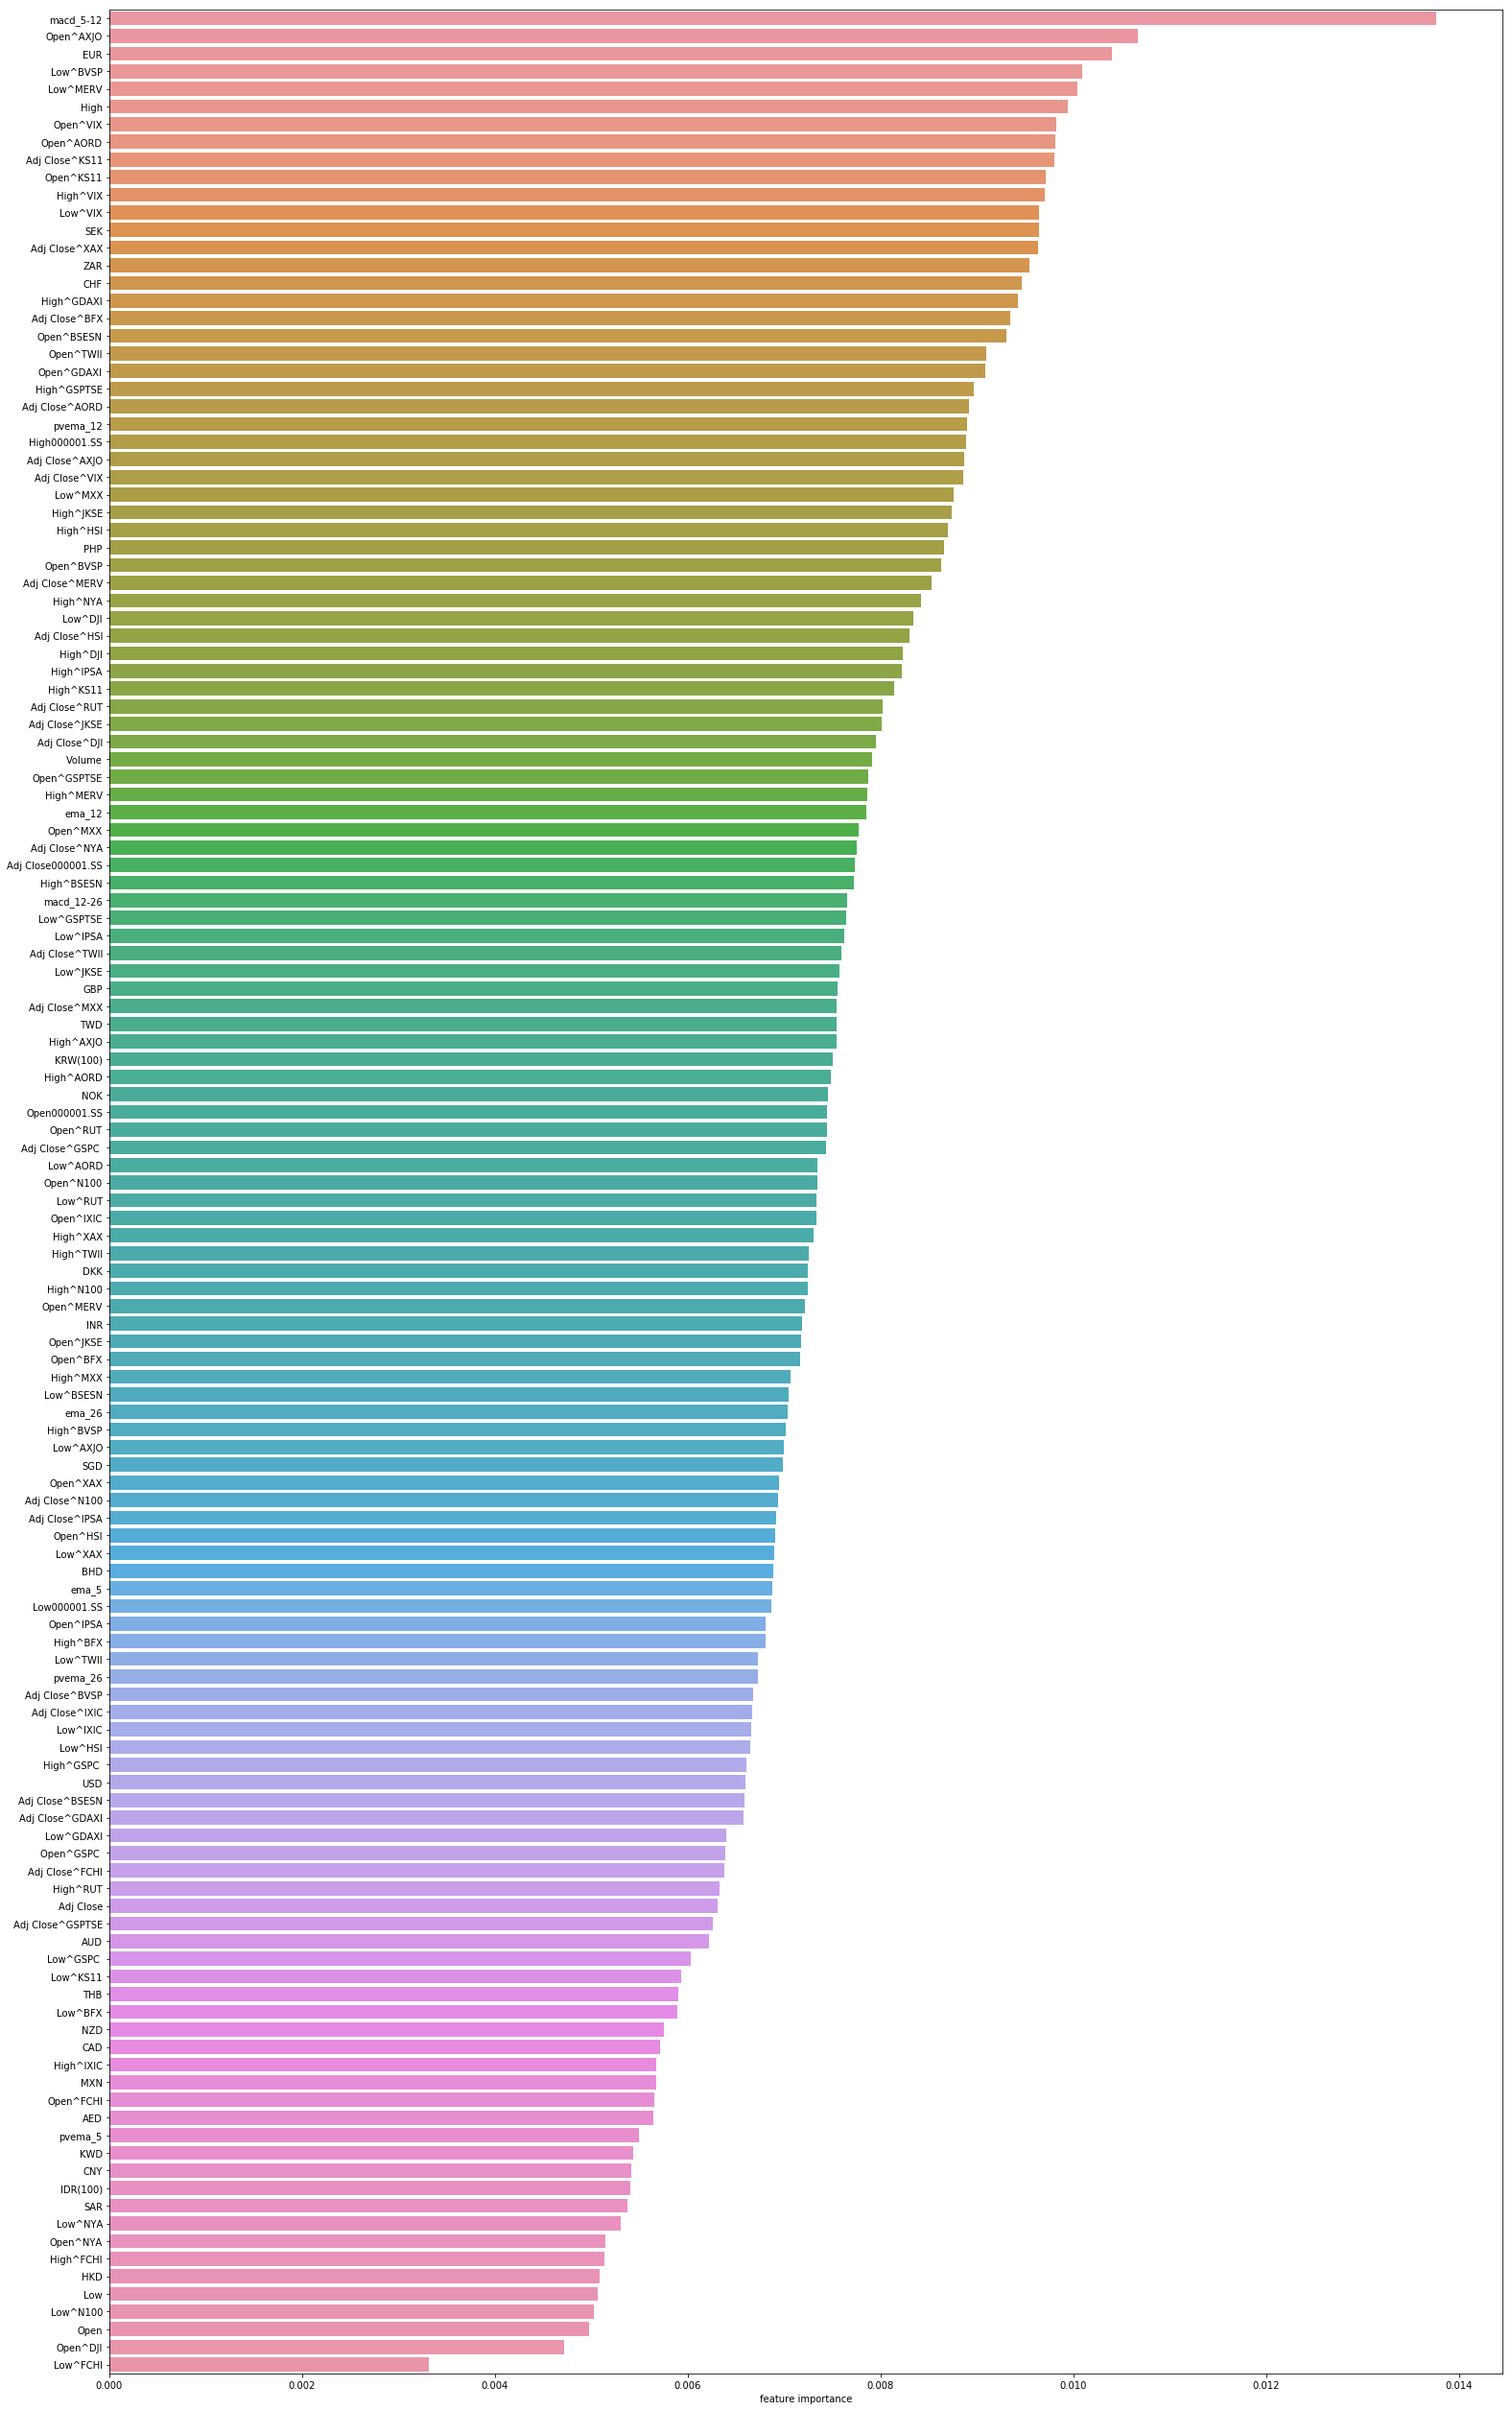

In [7]:
# 特徴量の重要度を確認
ranking = np.argsort(-rf.feature_importances_)
f, ax = plt.subplots(figsize=(22, 35))
sns.barplot(x=rf.feature_importances_[ranking], y=stock_data.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

In [8]:
# LightGBMによる学習
lgbm = lgb.LGBMClassifier(random_state=1)
lgbm.fit(stock_data, answers)

SelectFromModel(estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=1,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0),
        norm_order=1, prefit=False, threshold='median')

In [9]:
# 特徴量の重要度を確認
ranking = np.argsort(-lgbm.feature_importances_)
f, ax = plt.subplots(figsize=(22, 35))
sns.barplot(x=lgbm.feature_importances_[ranking], y=stock_data.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()

AttributeError: 'SelectFromModel' object has no attribute 'feature_importances_'

In [ ]:
# XGboostによる学習
xg = xgb.XGBClassifier(random_state=1)
xg.fit(stock_data, answers)

In [ ]:
# 特徴量の重要度を確認
ranking = np.argsort(-xg.feature_importances_)

f, ax = plt.subplots(figsize=(22, 35))
sns.barplot(x=xg.feature_importances_[ranking], y=stock_data.columns.values[ranking], orient='h')
ax.set_xlabel("feature importance")
plt.tight_layout()
plt.show()